## Small Image Classification Using Simple Aritifical Neural Network: GPU Benchmarking

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

##This command shows list of physical devices available for tensorflow. You can see GPU listed here. If you have NVIDIA GPU you need to install CUDA toolkit and cuDNN as per instruction on this webpage. Without proper installation you will not see GPU in list of devices

In [ ]:
tf.config.experimental.list_physical_devices()

In [5]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


2024-08-14 06:05:20.602283: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:0 with 15288 MB memory:  -> device: 0, name: Tesla P100-SXM2-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0
2024-08-14 06:05:20.603142: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:1 with 15288 MB memory:  -> device: 1, name: Tesla P100-SXM2-16GB, pci bus id: 0000:84:00.0, compute capability: 6.0
2024-08-14 06:05:20.607269: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:0 with 15288 MB memory:  -> device: 0, name: Tesla P100-SXM2-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0
2024-08-14 06:05:20.607527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:1 with 15288 MB memory:  -> device: 1, name: Tesla P100-SXM2-16GB, pci bus id: 0000:84:00.0, compute capability: 6.0


In [6]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

True


In [7]:
tf.test.is_gpu_available( cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-08-14 06:06:15.752217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:0 with 15288 MB memory:  -> device: 0, name: Tesla P100-SXM2-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0
2024-08-14 06:06:15.752510: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:1 with 15288 MB memory:  -> device: 1, name: Tesla P100-SXM2-16GB, pci bus id: 0000:84:00.0, compute capability: 6.0


True

In [8]:
 import tensorflow as tf
>>> print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [9]:
import tensorflow as tf
tf.test.gpu_device_name()

2024-08-14 06:07:01.417722: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:0 with 15288 MB memory:  -> device: 0, name: Tesla P100-SXM2-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0
2024-08-14 06:07:01.418139: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:1 with 15288 MB memory:  -> device: 1, name: Tesla P100-SXM2-16GB, pci bus id: 0000:84:00.0, compute capability: 6.0


'/device:GPU:0'

In [10]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [11]:
tf.__version__

'2.16.1'

In [12]:
tf.test.is_built_with_cuda()

True

## this Below the Commands are Check Cuda is Avialbe are not , in pytorch 

In [ ]:
# import torch

# # Check if CUDA is available
# if torch.cuda.is_available():
#     print("CUDA is available! Running on GPU.")
#     # Add your GPU-specific commands here
#     # Example: Set the device
#     device = torch.device("cuda")
#     print("Using device:", device)

#     # Example command using GPU
#     tensor = torch.randn(3, 3).to(device)
#     print("Tensor on GPU:", tensor)

# else:
#     print("CUDA is not available. Running on CPU.")
#     # Add your CPU-specific commands here
#     # Example: Set the device
#     device = torch.device("cpu")
#     print("Using device:", device)

#     # Example command using CPU
#     tensor = torch.randn(3, 3).to(device)
#     print("Tensor on CPU:", tensor)


## Load the dataset

In [ ]:
## https://keras.io/api/datasets/   .  This Artical to follow to Downlaods a Dataset through a Keras 

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2708s 16us/step


In [14]:
print("x_train.shape", x_train.shape)


print("y_train.shape" , y_train.shape)

      

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)


In [15]:
print("y_train.shape", y_train.shape)


print("y_train.shape" , y_test.shape)


y_train.shape (50000, 1)
y_train.shape (10000, 1)


In [ ]:
# x_train.shape == (50000, 32, 32, 3)
# x_test.shape == (10000, 32, 32, 3)
# y_train.shape == (50000, 1)
# y_test.shape == (10000, 1)

## Data Visualization

None


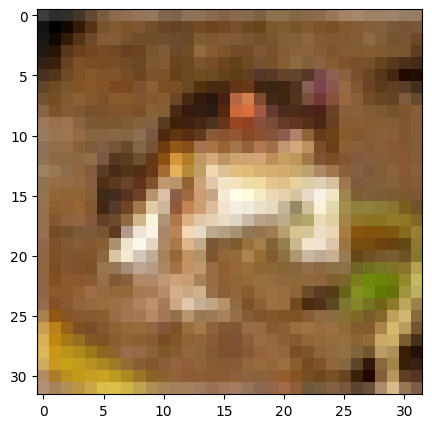

In [20]:
def plot_sample(index):
    plt.figure(figsize = (10,5))
    plt.imshow(x_train[index])
print(plot_sample(0))    

None


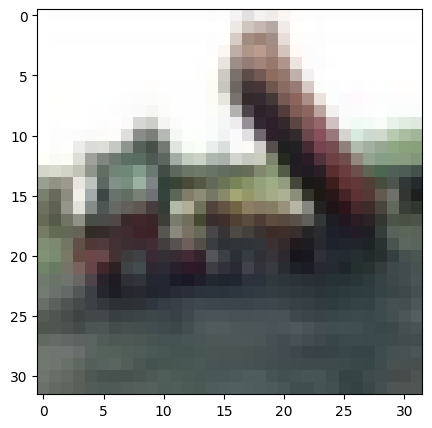

In [23]:
print(plot_sample(2))

In [25]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [26]:
classes[y_train[3][0]]

'deer'

In [27]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
# Loads the CIFAR10 dataset.

# This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

# The classes are:

# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck

In [28]:
y_test.shape

(10000, 1)

In [30]:
x_train.shape

(50000, 32, 32, 3)

## Preprocessing: Scale images

In [33]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [34]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [35]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
y_train_categorical[0:5]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Model building and training ANN Model 

In [39]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs=1)

I0000 00:00:1723619588.184891    1137 service.cc:145] XLA service 0x7fcfa0c19f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723619588.184934    1137 service.cc:153]   StreamExecutor device (0): Tesla P100-SXM2-16GB, Compute Capability 6.0
I0000 00:00:1723619588.184937    1137 service.cc:153]   StreamExecutor device (1): Tesla P100-SXM2-16GB, Compute Capability 6.0
2024-08-14 07:13:08.204679: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 90201
I0000 00:00:1723619588.268774    1137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 25s 4ms/step - loss: 1.8132 - accuracy: 0.3530


## Let's make some predictions

In [41]:
np.argmax(model.predict(x_test_scaled)[0])

313/313 [==============================] - 1s 2ms/step


6

In [42]:
y_test[0]

array([3], dtype=uint8)

In [43]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## Measure training time on a CPU

In [45]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

   3/1563 [..............................] - ETA: 1:09 - loss: 2.3669 - accuracy: 0.1146 

I0000 00:00:1723619682.110282    1137 service.cc:145] XLA service 0x7fcfa1d7fad0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723619682.110313    1137 service.cc:153]   StreamExecutor device (0): Host, Default Version


1563/1563 [==============================] - 77s 49ms/step - loss: 1.8126 - accuracy: 0.3545
1min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Lets measure training time on a GPU (I've NVIDIA Tesla P100-SXM2-16GB with Two GPUs)

In [47]:
# !nvidia-smi 

Wed Aug 14 07:16:48 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.28.03              Driver Version: 560.28.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-SXM2-16GB           Off |   00000000:06:00.0 Off |                  Off |
| N/A   39C    P0             42W /  300W |   15570MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [49]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 7s 4ms/step - loss: 1.8135 - accuracy: 0.3535
9.97 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Lets run same test for 10 epocs

In [51]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.8119 - accuracy: 0.3587
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.6253 - accuracy: 0.4280
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5407 - accuracy: 0.4570
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4814 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4330 - accuracy: 0.4957
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.3876 - accuracy: 0.5106
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.3517 - accuracy: 0.5253
Epoch 8/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.3158 - accuracy: 0.5397
Epoch 9/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.2828 - accuracy: 0.5499
Epoch 10/10
1563/1563 [==============================] - 75s 48m

In [53]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8132 - accuracy: 0.3540
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6228 - accuracy: 0.4275
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5420 - accuracy: 0.4570
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4827 - accuracy: 0.4790
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4327 - accuracy: 0.4961
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3891 - accuracy: 0.5135
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3511 - accuracy: 0.5259
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3174 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2849 - accuracy: 0.5517
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.254

# Here is the performance comparison for 1 epoch,

#       Epoch       CPU              GPU
# 1     Epoch  1 min[CPU]        [GPU] 9.97 Sec
# 10    Epoch   12 min[CPU]       [GPU] 1 min 

## Model Convolutional Neural Network (CNN)

In [55]:
import tensorflow as tf
from tensorflow import keras

def get_cnn_model():
    model = keras.Sequential([
        # Convolutional layers with pooling
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten the output for the Dense layers
        keras.layers.Flatten(),
        
        # Fully connected layers
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        
        # Output layer
        keras.layers.Dense(10, activation='softmax')    
    ])

    # Compile the model
    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# To create the model
model = get_cnn_model()


In [57]:
import time

In [60]:
# # Measure training time on CPU
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_cnn_model()
#     cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)


start_time = time.time()
with tf.device('/CPU:0'):
    cpu_model = get_cnn_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)
cpu_time = time.time() - start_time
print(f"Training time on CPU: {cpu_time:.2f} seconds")

1563/1563 [==============================] - 61s 37ms/step - loss: 2.1030 - accuracy: 0.2266
Training time on CPU: 62.54 seconds


In [62]:
# #Measure Training Time on GPU:

# # Measure training time on GPU
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     gpu_model = get_cnn_model()
#     gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)



start_time = time.time()
with tf.device('/GPU:0'):
    gpu_model = get_cnn_model()
    gpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)
gpu_time = time.time() - start_time
print(f"Training time on GPU: {gpu_time:.2f} seconds")

1563/1563 [==============================] - 14s 7ms/step - loss: 2.1293 - accuracy: 0.2064
Training time on GPU: 16.11 seconds


In [ ]:
## Measure Training Time for Multiple Epochs

In [64]:
## On CPU:

# # Measure training time on CPU for 10 epochs
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_cnn_model()
#     cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

start_time = time.time()
with tf.device('/CPU:0'):
    cpu_model = get_cnn_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)
cpu_time = time.time() - start_time
print(f"Training time on CPU: {cpu_time:.2f} seconds")


Epoch 1/10
1563/1563 [==============================] - 61s 37ms/step - loss: 2.1337 - accuracy: 0.2088
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7630 - accuracy: 0.3605
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5372 - accuracy: 0.4428
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3975 - accuracy: 0.4997
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.2905 - accuracy: 0.5405
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2081 - accuracy: 0.5718
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1337 - accuracy: 0.6021
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0677 - accuracy: 0.6263
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0079 - accuracy: 0.6499
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [66]:
# ## On GPU:

# # Measure training time on GPU for 10 epochs
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     gpu_model = get_cnn_model()
#     gpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)



start_time = time.time()
with tf.device('/GPU:0'):
    gpu_model = get_cnn_model()
    gpu_model.fit(x_train_scaled, y_train_categorical, epochs=10)
gpu_time = time.time() - start_time
print(f"Training time on GPU: {gpu_time:.2f} seconds")

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 2.1174 - accuracy: 0.2111
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7631 - accuracy: 0.3598
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5390 - accuracy: 0.4444
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4006 - accuracy: 0.4989
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2879 - accuracy: 0.5407
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2004 - accuracy: 0.5760
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1267 - accuracy: 0.6040
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0581 - accuracy: 0.6289
Epoch 9/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9979 - accuracy: 0.6519
Epoch 10/10
1563/1563 [==============================] - 10s 7ms/step - l

# Here is the performance comparison for 1 epoch,

#       Epoch       CPU              GPU
# 1     Epoch  62.54 [CPU]        [GPU] 16. 11 Sec
# 10    Epoch   625.68 [CPU]       [GPU] 105.17 Sec